Dăscălescu Dana            
Stern Cristian David <br>
Grupa: 231

#### Pentru aceasta analiză vom folosi setul de date 'rock' (conține măsurători pentru 48 de probe de rocă dintr-un rezervor de petrol) care vine în mod implicit cu R.
Datele stabilite pentru acest studiu de caz au fost destinate să răspundă cel puțin la următoarele întrebări:
1. Ce valori trebuie luate în considerare pentru a determina care roci vor face un bun rezervor?  O rocă care este atât poroasă cât și permeabilă ar face o rocă de acumulare bună, deoarece permite petrolului și gazului să se deplaseze în sus prin porii din rocă, mai aproape de suprafața de unde poate fi extrasă.
2. Care este inter-relația(corelația) dintre forma spațiului porilor și permeabilitatea unei roci? Dar cea dintre aria porilor, forma acestora și permeabilitatea unei roci?


# 1. Operații de statistică descriptivă. 

In [3]:
head(rock)  # display the first 6 observations
attach(rock)

area,peri,shape,perm
4990,2791.90,0.0903296,6.3
7002,3892.60,0.1486220,6.3
7558,3930.66,0.1833120,6.3
7352,3869.32,0.1170630,6.3
7943,3948.54,0.1224170,17.1
7979,4010.15,0.1670450,17.1


###### Considerăm fiecare variabilă a setului de date separat.

> Area:

In [4]:
summary(area)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1016    5305    7487    7188    8870   12212 

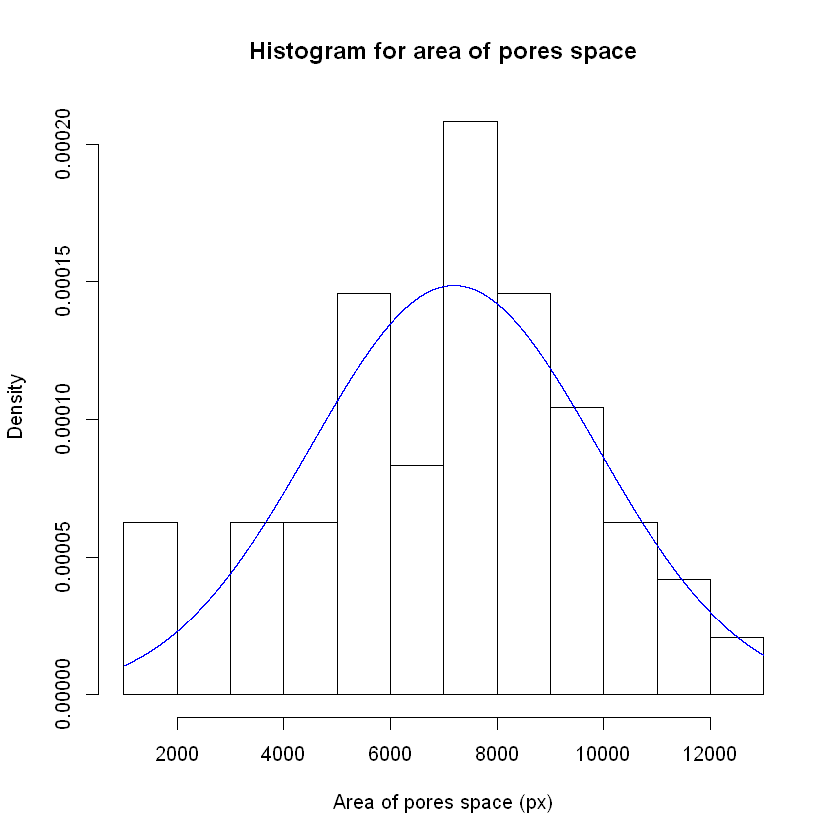

In [5]:
h1 <- hist(area,
     main="Histogram for area of pores space",
     xlab="Area of pores space (px)",
     freq=FALSE,
     breaks=13)
lines(seq(min(area), 13000, by=1), dnorm(seq(min(area), 13000, by=1),
      mean(area), sd(area)), col="blue")

&ensp; O _diagramă de frecvență_ dă o impresia imediată asupra valorilor, frecvenței relative și împrăștierii asociate datelor. 
Ea este obținută dacă ordonata histogramei este împărțită la numărul total de observații, 48 în acest caz, 
și la lățimea intervalului $ \Delta $ . Este important să fie ales un număr de intervale în concordanță cu informația care
vrea să fie extrasă  din modelul matematic.
Numărul de intervale $ \Delta $ este $ 1 + 3,3*\ln n  $ ( Sturges, în 1926, a sugerat, ca un model practic, 
ca numărul de intervale alese k să fie <br> <center> $ k = 1 + 3,3 * \ln n $ </center> <br> unde _n_ este numărul de date).

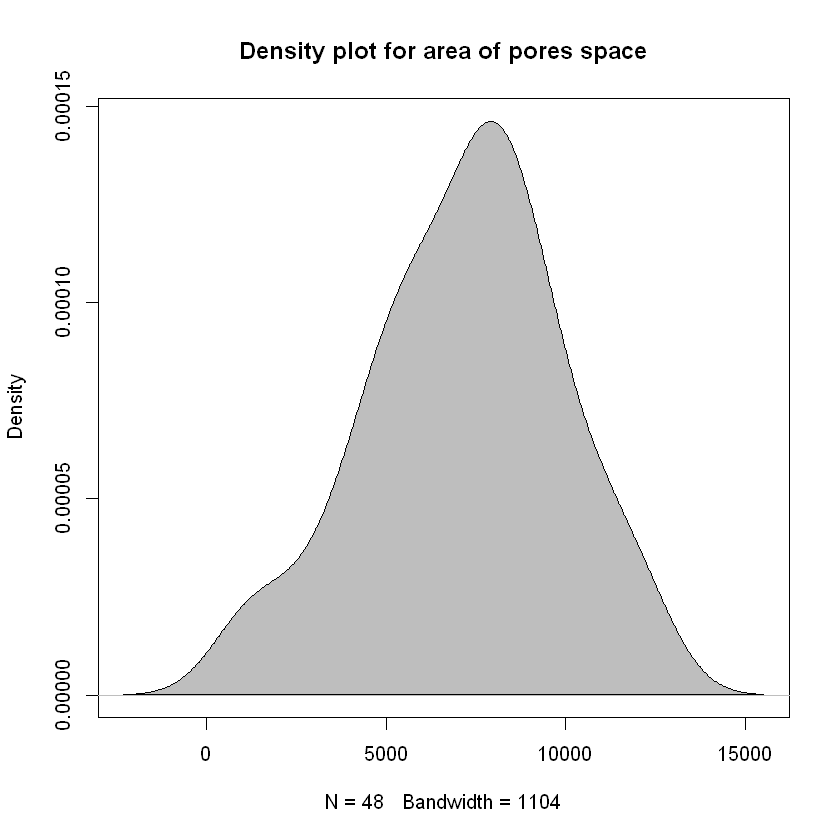

In [6]:
plot(density(area), main = "Density plot for area of pores space")
polygon(density(area), col="gray")

&ensp; Distribuția este aproximativ în formă de clopot, care este forma distribuției normale(Gaussiană). Dar spre deosebire de o adevărată distribuție normală, această distribuție este asimetrică; are o coadă care se întinde mai mult spre stânga decât spre dreapta.

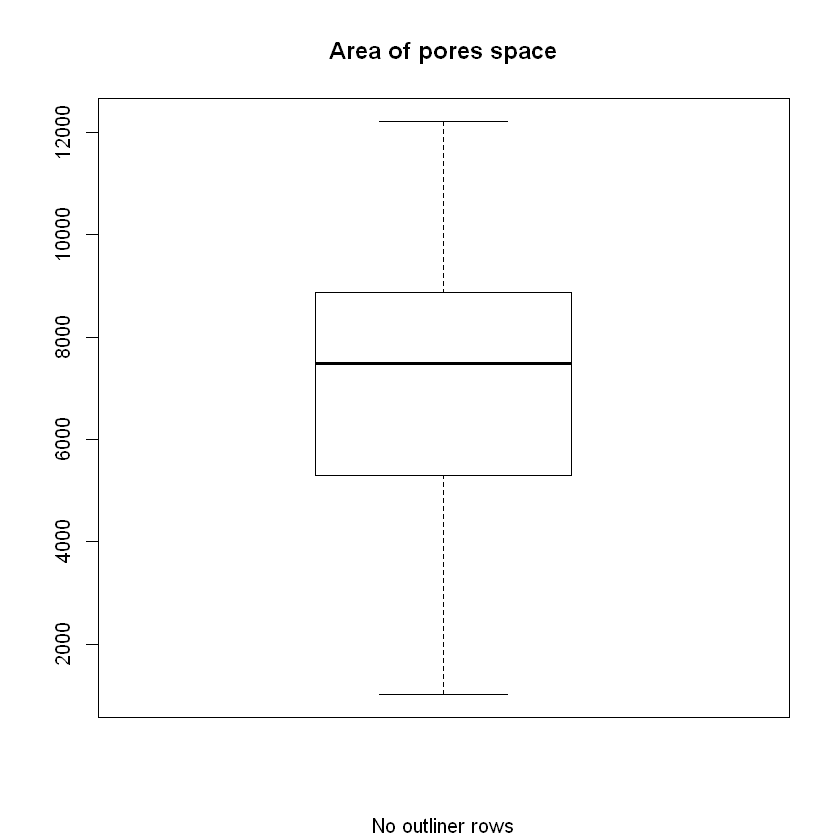

In [7]:
boxplot(area, main="Area of pores space", sub = paste("No outliner rows"));

> Peri

In [8]:
summary(peri)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  308.6  1414.9  2536.2  2682.2  3989.5  4864.2 

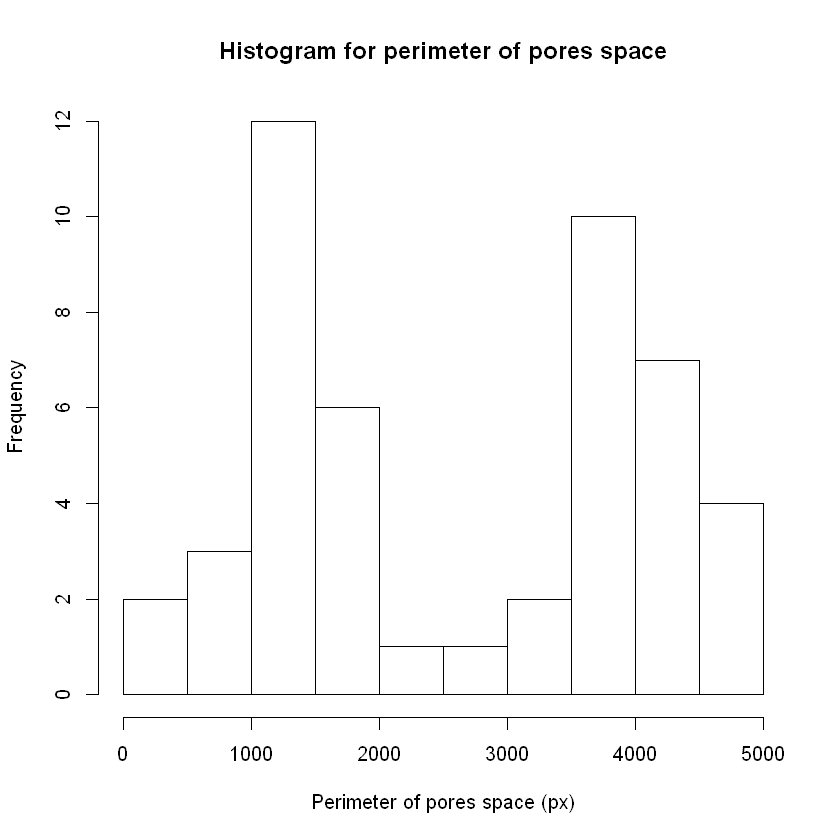

In [9]:
h2 <- hist(peri,
     main="Histogram for perimeter of pores space",
     xlab="Perimeter of pores space (px)",
     breaks=13)

Distributia perimetrului porilor este aproximativ simetrica

In [10]:
h2

$breaks
 [1]    0  500 1000 1500 2000 2500 3000 3500 4000 4500 5000

$counts
 [1]  2  3 12  6  1  1  2 10  7  4

$density
 [1] 8.333333e-05 1.250000e-04 5.000000e-04 2.500000e-04 4.166667e-05
 [6] 4.166667e-05 8.333333e-05 4.166667e-04 2.916667e-04 1.666667e-04

$mids
 [1]  250  750 1250 1750 2250 2750 3250 3750 4250 4750

$xname
[1] "peri"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

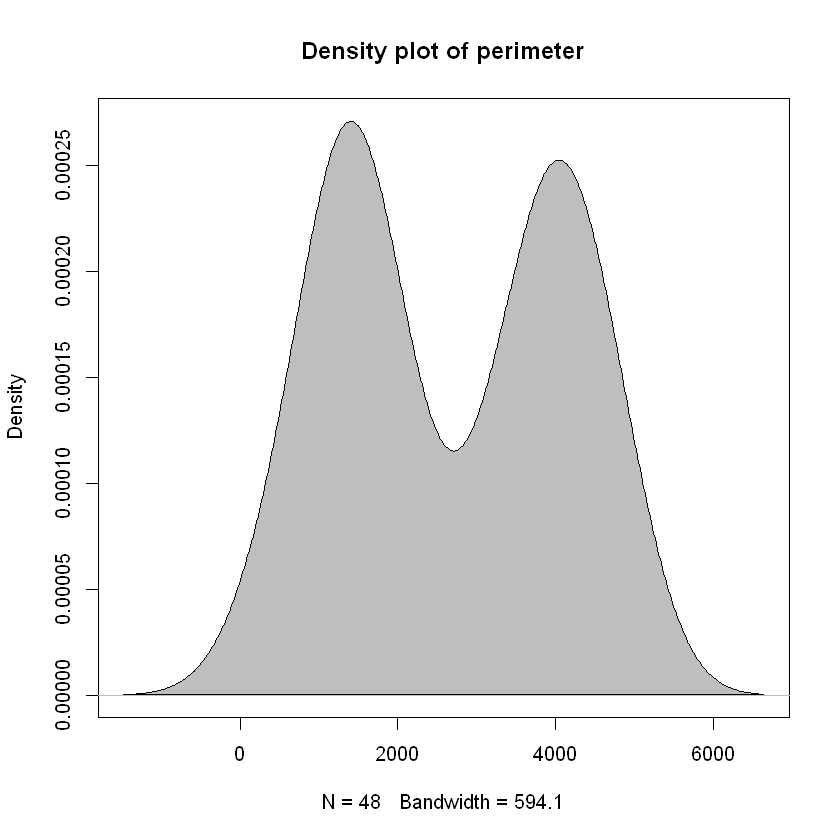

In [11]:
plot(density(peri), main="Density plot of perimeter")
polygon(density(peri), col="gray")

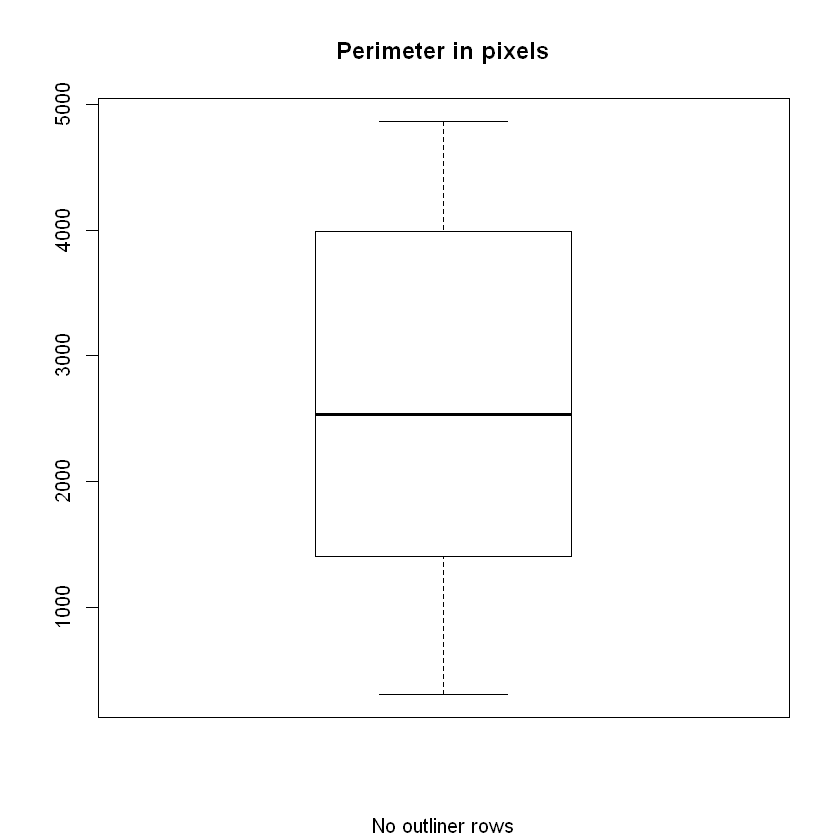

In [12]:
boxplot(peri, main="Perimeter in pixels", sub = paste("No outliner rows"));

> Shape

In [13]:
summary(shape)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.09033 0.16226 0.19886 0.21811 0.26267 0.46413 

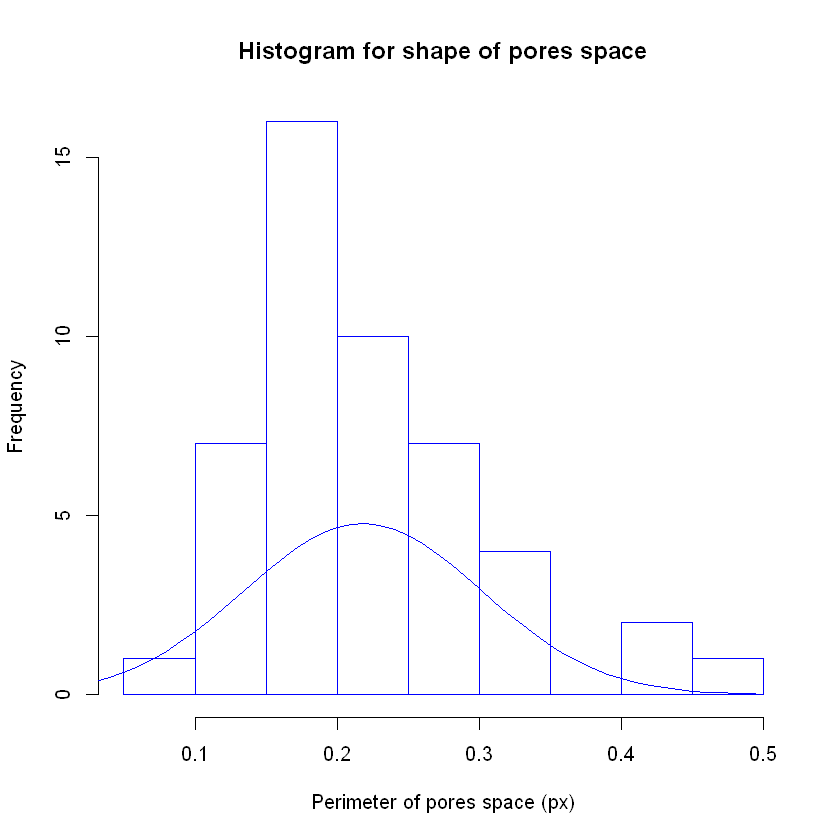

In [35]:
h3 <- hist(shape,
     main="Histogram for shape of pores space",
     xlab="Perimeter of pores space (px)",
     ylab="Frequency", 
     border="blue",
     breaks=13)
lines(seq(0, 0.5, by=0.01), dnorm(seq(0, 0.5, by=0.01), mean(shape), sd(shape)), col="blue")

O histograma inclinata in stanga sugereaza ca media perimetrelor porilor in pixeli este mai mare decat mediana acestora.

In [15]:
h3

$breaks
 [1] 0.05 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50

$counts
[1]  1  7 16 10  7  4  0  2  1

$density
[1] 0.4166667 2.9166667 6.6666667 4.1666667 2.9166667 1.6666667 0.0000000
[8] 0.8333333 0.4166667

$mids
[1] 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475

$xname
[1] "shape"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

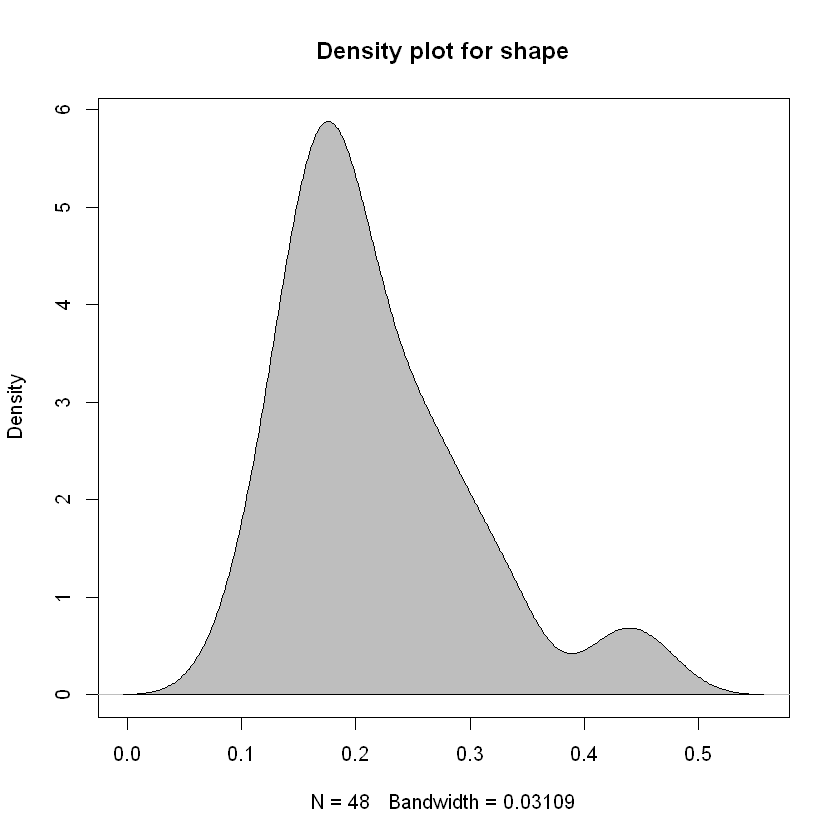

In [16]:
plot(density(shape), main="Density plot for shape")
polygon(density(shape), col="gray")

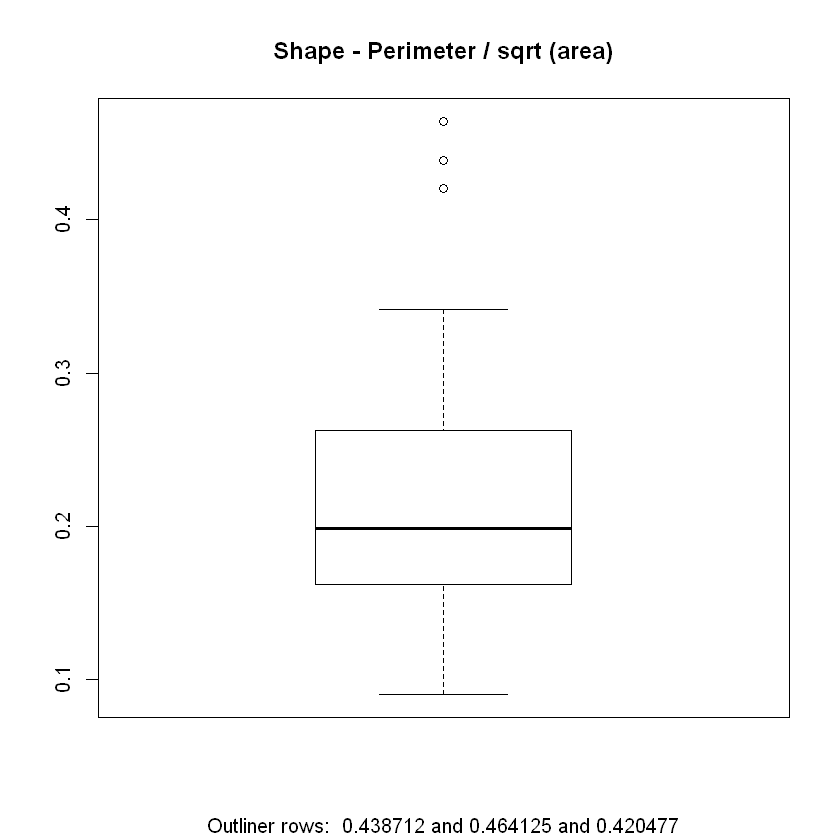

In [17]:
boxplot(shape,
        main="Shape - Perimeter / sqrt (area)", 
        sub = paste("Outliner rows: ", paste(boxplot.stats(shape)$out, collapse=' and ')
));

> Perm

In [18]:
summary(perm)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.30   76.45  130.50  415.45  777.50 1300.00 

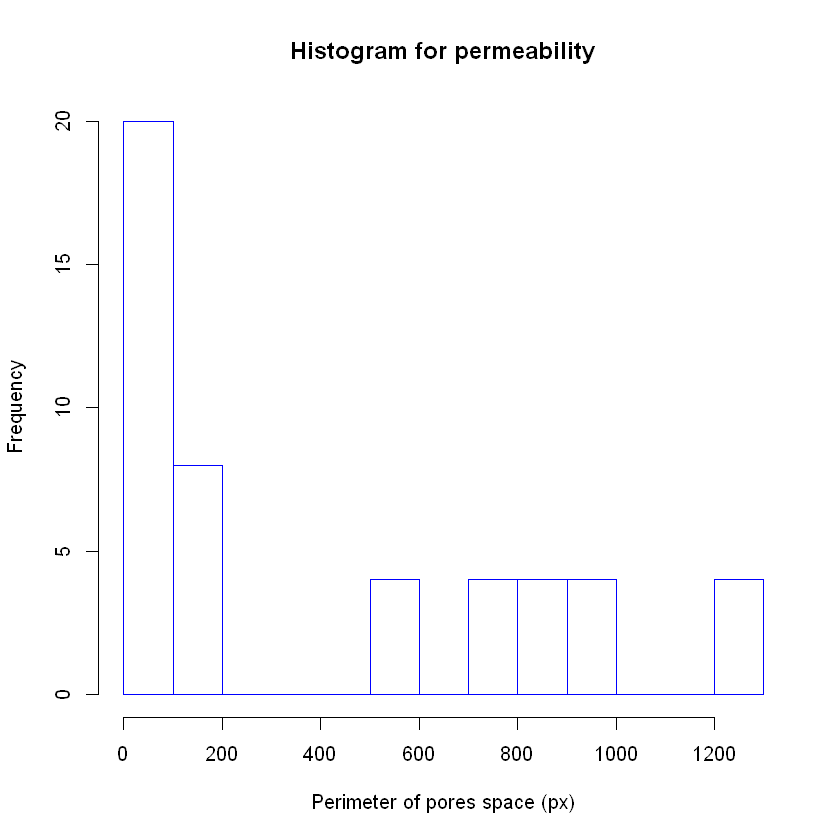

In [19]:
h4 <- hist(perm,
     main="Histogram for permeability",
     xlab="Perimeter of pores space (px)",
     ylab="Frequency", 
     border="blue",
     breaks=13)

In [20]:
h4

$breaks
 [1]    0  100  200  300  400  500  600  700  800  900 1000 1100 1200 1300

$counts
 [1] 20  8  0  0  0  4  0  4  4  4  0  0  4

$density
 [1] 0.0041666667 0.0016666667 0.0000000000 0.0000000000 0.0000000000
 [6] 0.0008333333 0.0000000000 0.0008333333 0.0008333333 0.0008333333
[11] 0.0000000000 0.0000000000 0.0008333333

$mids
 [1]   50  150  250  350  450  550  650  750  850  950 1050 1150 1250

$xname
[1] "perm"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

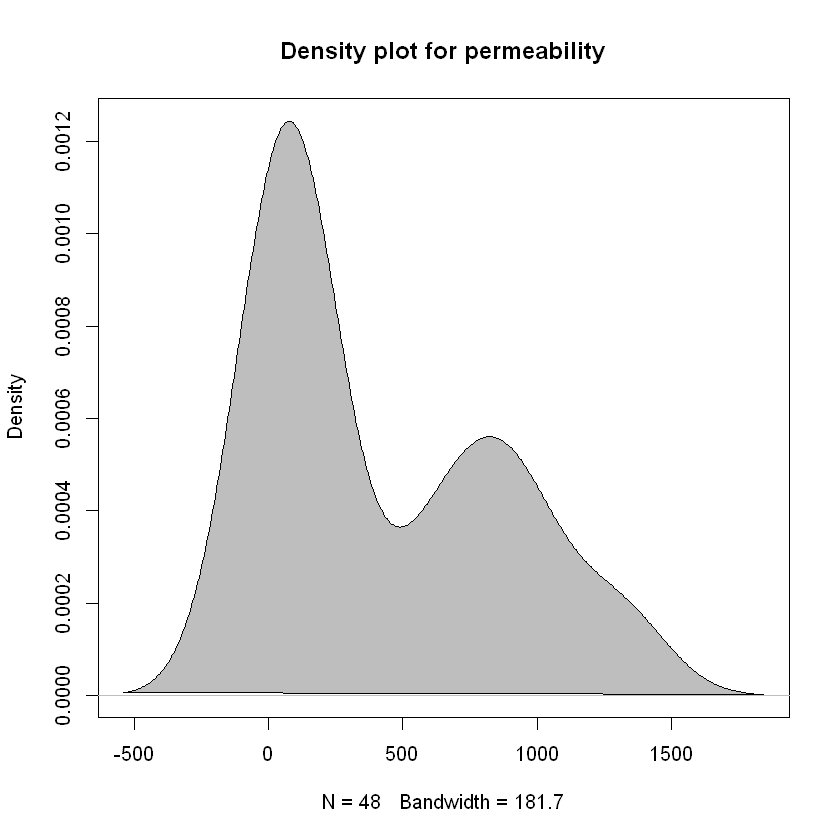

In [21]:
plot(density(perm), main="Density plot for permeability")
polygon(density(perm), col="gray")

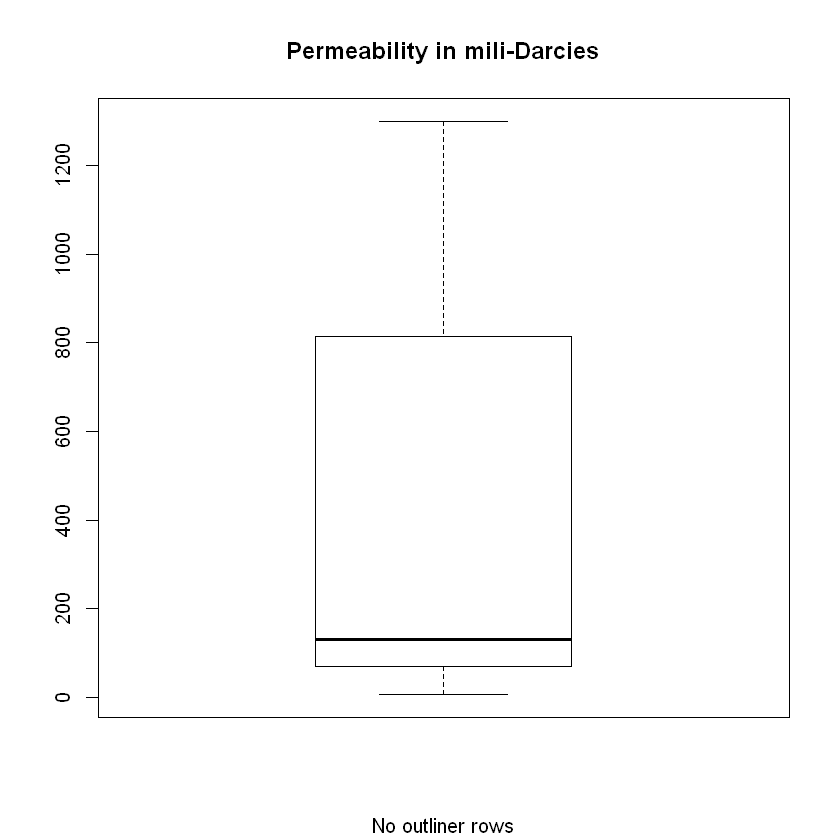

In [22]:
boxplot(perm, main="Permeability in mili-Darcies", sub = paste("No outliner rows"));

# 2. Modele de regresie

## 2.1 Regresie simplă
###### Scop: De a construi un model de regresie simplă pe care îl putem folosi pentru a prezice permeabilitatea prin stabilirea unei relații liniare semnificative statistice cu forma suprafeței porilor

### I. Analiza grafică

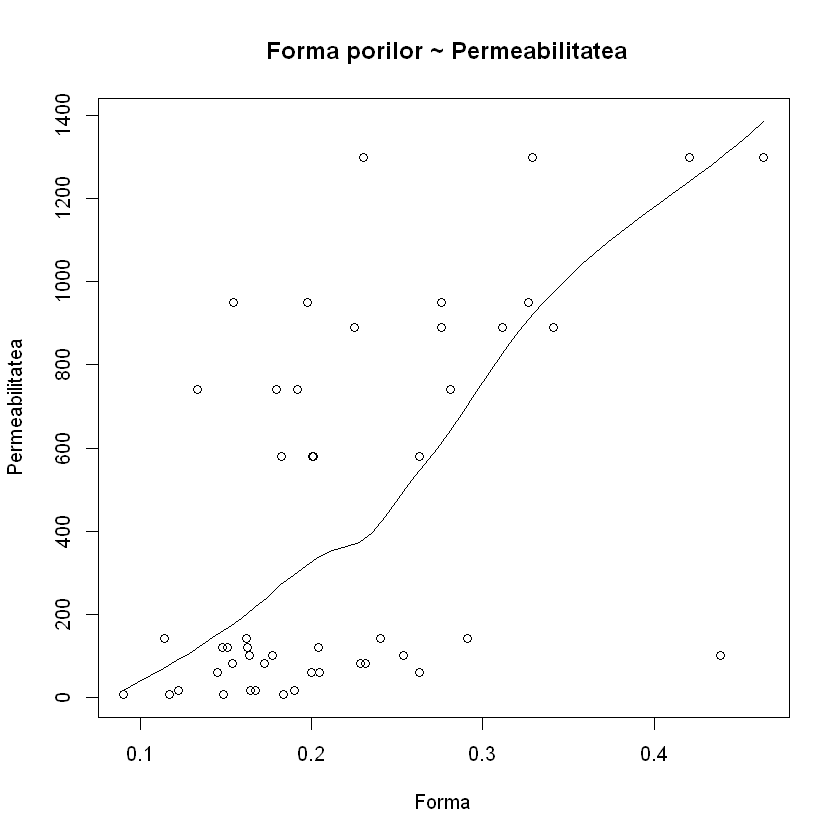

In [23]:
scatter.smooth(x=shape, y = perm, xlab = "Forma", ylab = "Permeabilitatea" , main = " Forma porilor ~ Permeabilitatea");

Diagrama de împrăștiere sugerează o relație de creștere liniară dintre 'shape' și 'perm'. Ceea ce îndeplinește cerința ca într-o regresie liniară relația dintre variabila răspuns și variabila predictor să fie liniară și aditivă.

### Verifică existența valorilor aberante

Valorile extreme(aberante) pot denatura predicțiile și pot afecta precizia. Din acest motiv este important să le identificăm și să le tratăm corespunzător.

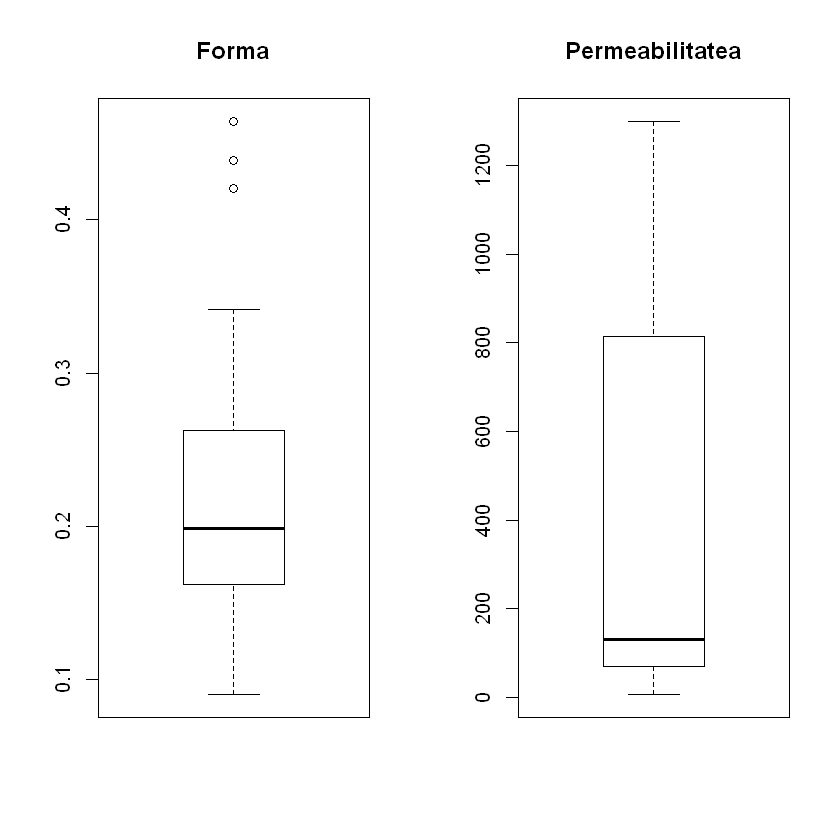

In [24]:
par(mfrow=c(1, 2))
boxplot(shape, main="Forma", outline = TRUE)
boxplot(perm, main="Permeabilitatea", outline = TRUE)

### Densitatea 

Warning message:
"package 'e1071' was built under R version 3.6.2"

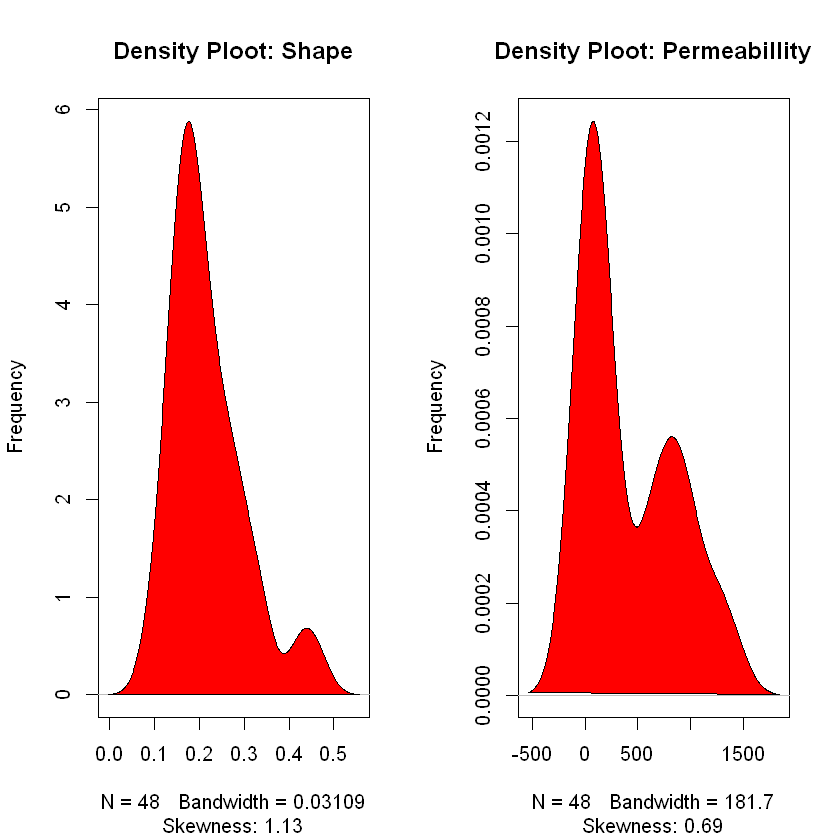

In [37]:
library(e1071)
par(mfrow=c(1, 2))
plot(density(shape), main="Density Ploot: Shape", ylab="Frequency"
    , sub= paste("Skewness:", round(e1071::skewness(shape), 2)))
polygon(density(shape), col="red")
plot(density(perm), main="Density Ploot: Permeabillity", ylab="Frequency"
    , sub= paste("Skewness:", round(e1071::skewness(perm), 2)))
polygon(density(perm), col="red")

### Corelația

&ensp; Coefiecientul de corelație măsoară interdependența liniară a variabilelor aleatoare, adică acuratețea cu care o variabilă aleatoare poate fi aproximată printr-o funcție liniară de cealaltă.

In [26]:
cor(shape, perm)

[1] 0.5567208

&ensp; Coeficientul de corelație aparține intervalului $ [0.25,0.75] $ ceea ce indică că variabilele sunt corelate.

### Construim regresia liniară

In [27]:
linearMod <- lm(perm ~ shape, data=rock) #build linear regression model
print(linearMod)


Call:
lm(formula = perm ~ shape, data = rock)

Coefficients:
(Intercept)        shape  
     -221.3       2919.2  



Acum că am construit modelul liniar, am stabilit, de asemenea, relația dintre variabila predictor și variabila răspuns sub forma unei formule matematice pentru variabila răspuns(shape) și predictorul(perm). <br>
<center> $ permeability = Intercept + ( \beta * shape) \iff permeability = -221.3 + 2919.2 * shape $ </center>


In [28]:
summary(linearMod)


Call:
lm(formula = perm ~ shape, data = rock)

Residuals:
   Min     1Q Median     3Q    Max 
-959.4 -250.5 -104.8  230.5  849.6 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -221.3      149.8  -1.477    0.146    
shape         2919.2      642.2   4.545 3.97e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 367.6 on 46 degrees of freedom
Multiple R-squared:  0.3099,	Adjusted R-squared:  0.2949 
F-statistic: 20.66 on 1 and 46 DF,  p-value: 3.969e-05


&ensp; Înainte să folosim modelul trebuie să ne asigurăm că modelul de regresie construit este semnificativ din punct de vedere statistic. 

&emsp; Fie $X_{1} $,$X_{2} $,...,$X_{n} $ o seleție independentă de mărime n dintr-o populație X cu o presupusă densitate f(x;$ \Theta $) sau masă p(x;$ \Theta $), unde $ \Theta $ poate fi specificată sau nu. Notăm cu _H_ ipoteza că selecția reprezintă n valori ale unei variabile aleatoare cu densitatea f(x;$ \Theta $) sau masă p(x;$ \Theta $). Această ipoteză este numită _ipoteză simplă_ când repartiția este complet specificată când repartiția este complet specificată, adică valorile parametrului sunt specificate împreună cu forma funcțională a densității sau masei, altfel este o ipoteză compusă. Pentru a construi un criteriu pentru testarea ipotezelor este necesar să fie stabilită o ipoteză alternativă împotriva căreia ipoteza _H_ poate fi testată. Un exemplu de ipoteză alternativă este altă repartiție presupusă sau ipoteza poate fi testată împotriva ipotezei alternative că ipoteza _H_ nu este adevărată. Vom considera în continuare ultima alegere.

&emsp; **p-value** este utilizată în contextul testării ipotezei nule pentru a cuantifica ideea semnificației statistice a probelor(testarea ipotezei nule este un argument de tip reducere la absurd adaptat statisticilor). Ipoteza alternativă este aceea că coeficienții nu sunt egali cu zero (i.e există o relație între variabila independentă în cauză și variabila dependentă).<br>
&emsp;Cu cât este mai mică **p-value**, cu atât este mai mare semnificația statistică, deoarece îi spune investigatorului că ipoteza analizată poate să nu explice în mod adecvat obsevația. Ipoteza nulă este respinsă dacă oricare dintre aceste probabilități este mai mică sau egală cu o valoare de prag mică, fixă, preddefinită în mod arbitrar $ \alpha $. Spre deosebire de **p-value**, $ \alpha $ nu este derivat din date observaționale și nu depinde de ipotezaa de bază. Prin convenție $ \alpha $ este setat de obicei la $ 0.05, 0.01, 0.001 $.

&emsp; Putem interpreta **t-value** astfel: o valoare **t-value** mică indică faptul că este mai puțin probabil ca coeficientul să nu fie egal cu zero pur întâmplător. Deci, cu cât este mai mare **t-value**, cu atât mai bine.

&emsp; Probabilitatea $ P(>|t|) $ sau **p-value** este probabilitate de a obține o valoare **t-value** cât mai mare sau mai mare decât valoarea observată când ipoteza nulă( coeficentul $ \beta $ este egal cu zero sau nu există nicio relație între variabila independentă în cauză și variabila dependentă) este adevărată. 

&emsp; Ce înseamnă pentru noi asta?
Când valoarea **p-value** este mai mică $ 0.05 $ putem respinge în siguranță ipoteza nulă potrivit căreia coeficientul $ \beta $ al predictorului este zero.

&emsp; Când eroarea standard și valoarea coeficienților este cunoscută putem calcula valoarea rației **t-Statistic** astfel:<br>
<center> $ t-Statistic =  \frac{\beta}{Err.Standard} $ </center>

In [38]:
modelSummary <- summary(linearMod) #capture model summary as an object
modelCoefficients <- modelSummary$coefficients # model coefficients
beta_estimate <- modelCoefficients["shape", "Estimate"] # get beta estimate for shape
standard_error <- modelCoefficients["shape", "Std. Error"] # gets standard errror for shape
t_value <- beta_estimate/standard_error # calculate t-statistic
p_value <- 2*pt(-abs(t_value), df=nrow(rock)-ncol(rock)) #calculate the p-value
f_statistic <- linearMod$fstatistic[1] # fstatistic
f <- summary(linearMod)$fstatistic 
model_p <- pf(f[1], f[2], f[3], lower=FALSE)

In [39]:
# t-Value:
t_value

[1] 4.545403

In [40]:
# p-Value:
p_value

[1] 4.257061e-05

In [41]:
# Model F Statistic:
f

value    numdf    dendf 
20.66069  1.00000 46.00000

In [42]:
# Model p-Value:
model_p

value 
3.969207e-05

> ### $R^2$ și $R^2$ ajustat

&emsp;Ce ne spune $R^2$ este proporția variației variabilei dependente care a fost elaborata de modelul nostru.<br><center>$ R^2 = 1 - \frac{SSE}{SST} $</center><br>unde SSE este suma pătratelor erorilor, $ SSE=\sum_{i}^n (y_{i} - ŷ_{i})^2 $
, iar SST este suma totalului de pătrate, $ SST=\sum_{i}^n (y_{i} - ȳ_{i})^2 $.<br>
Cu cât $R^2$ este mai mare, cu atât mai bine.

Când adăugăm mai multe date predictor modelului nostru, valoarea $R^2$ a noului model va crește pentru că toate variabilele din modelul initial sunt prezente si in modelul extins, de aceea folosim $R^2$ ajustat. $R^2$ ajustat tine cont de numarul total de termeni ai modelului nostru.<br><center> $R^2_{adj} = 1 - \frac{(1 - R^2)(n - 1)}{n - q} $ </center>, unde n este numarul de observatii, iar q este numarul de coeficienti ai modelului.

> ### AIC și BIC

"Akaike's information criterion" și "Bayesian information critetion" sunt măsuri ale performanței de antrenare a unui model statistic și pot fi de asemenea utilizate pentru selectarea modelului

In [44]:
AIC(linearMod)

[1] 707.254

In [45]:
BIC(linearMod)

[1] 712.8676

### Prezicerea modelelor liniare

Impărtim setul de date in două dupa cum urmează:<br>80% pentru antrenare;<br>20% pentru testare.

Construim apoi modelul pe eșantionul de 80%, folosindu-l ulterior pentru a prezice variabila pe datele de testare

In [46]:
trainingRowIndex <- sample(1:nrow(rock), 0.8*nrow(cars))
trainingData <- rock[trainingRowIndex, ]
testData <- rock[-trainingRowIndex, ]

Modelul se antrenează, ulterior fiind capabil sa prezica permeabilitatea rocilor in functie de forma acestora

In [47]:
lmMod <- lm(perm ~ shape, data=trainingData)
permPrediction <- predict(lmMod, testData)

In [49]:
summary(lmMod)
AIC(lmMod)


Call:
lm(formula = perm ~ shape, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-912.44 -263.65  -99.96  267.24  697.74 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -159.7      158.3  -1.009 0.319379    
shape         2671.8      664.3   4.022 0.000264 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 366.4 on 38 degrees of freedom
Multiple R-squared:  0.2986,	Adjusted R-squared:  0.2801 
F-statistic: 16.18 on 1 and 38 DF,  p-value: 0.0002644


[1] 589.7565

Analizând din nou datele, observam un **p-value** mai mic decât cel calculat precedent, dar si AIC mai mic.

In [53]:
actuals_preds <- data.frame(cbind(actuals=testData$perm, predicteds = permPrediction))
correlation_accuracy <- cor(actuals_preds, )
correlation_accuracy

,actuals,predicteds
actuals,1.0000000,0.6999281
predicteds,0.6999281,1.0000000


Observam o corelatie buna a valorilor prezise. Urmeaza sa calculăm acuratetea si rata de eroare, ca sa ne dam seama cât de performant este modelul nostru.

<center>$MinMaxAccuracy = mean(\frac{min(actuals, predicteds)}{max(actuals, predicteds)})$ </center>


$ MeanAbsolutePercentageError(MAPE) = mean(\frac{abs(predicteds - actuals)}{actuals}) $

In [56]:
min_max_accuracy <- mean(apply(actuals_preds, 1, min) / apply(actuals_preds, 1, max))  
mape <- mean(abs((actuals_preds$predicteds - actuals_preds$actuals)) / actuals_preds$actuals)

In [58]:
min_max_accuracy

[1] 0.3226672

In [59]:
mape

[1] 8.371678

## K-fold cross-validation

In [69]:
library(tidyverse)
library(caret)

Warning message:
"package 'tidyverse' was built under R version 3.6.2"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'caret' was built under R version 3.6.2"Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift



K-fold cross-validation evaluează performanta modelului pe diferite sumbultimi de date de antrenare, apoi calculeaza o rată de eroare medie.

In [71]:
trainingData.control <- trainControl(method = "cv", number = 10)

model <- train(perm ~ shape, data = rock, method = "lm",
              trControl = trainingData.control)

In [72]:
print(model)

Linear Regression 

48 samples
 1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 43, 43, 42, 43, 43, 43, ... 
Resampling results:

  RMSE     Rsquared   MAE     
  362.808  0.4711507  302.7106

Tuning parameter 'intercept' was held constant at a value of TRUE


## 2.2 Regresie multiplă

# 3. Distribuția Hipergeometrică Noncentrală a lui Fisher

&emsp; În teoria probabilității și statisticilor, **distribuția hipergeometrică noncentrală a lui Fisher** este o generalizare a distribuției hipergeometrice unde probabilitățile eșantioanelor sunt modificate de ponderile asociate. De asemenea, poate fi definit ca distribuția condiționată a două sau mai multe variabile distribuite binomial, dependente de suma lor fixă.